In [1]:
# Nama : JIRYAN FAROKHI
# Email : jiryanfarokhi@gmail.com
# Domisili : Surabaya

In [37]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

In [38]:
!wget -q https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip -o -q rockpaperscissors.zip -d ./

In [54]:
dir = '../content/rockpaperscissors'
classes_to_remove = ['rps-cv-images']
paths_to_remove = [os.path.join(dir, cls) for cls in classes_to_remove]
for path in paths_to_remove:
    try:
        shutil.rmtree(path)
        print(f"Kelas {os.path.basename(path)} berhasil dihapus.")
    except Exception as e:
        print(f"Gagal menghapus kelas {os.path.basename(path)}: {e}")
print(os.listdir(dir))

Gagal menghapus kelas rps-cv-images: [Errno 2] No such file or directory: '../content/rockpaperscissors/rps-cv-images'
['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']


In [55]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)

In [56]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.4
)

In [57]:
train_generator = train_datagen.flow_from_directory(
    dir,
    target_size = (150,150),
    shuffle = True,
    subset = 'training',
    batch_size = 8
)

validation_generator = validation_datagen.flow_from_directory(
    dir,
    target_size= (150,150),
    subset = 'validation',
    batch_size = 8
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [59]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 17, 64)       

In [61]:
checkpoint_callback = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
early_stopping_callback = EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss')

In [68]:
history = model.fit(
    train_generator,
    steps_per_epoch=33,
    epochs=30,
    validation_steps=5,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/30
33/33 [==============================] - 9s 270ms/step - loss: 0.3897 - accuracy: 0.8826 - val_loss: 0.4711 - val_accuracy: 0.9000
Epoch 2/30
33/33 [==============================] - 10s 291ms/step - loss: 0.3369 - accuracy: 0.8750 - val_loss: 0.3238 - val_accuracy: 0.8500
Epoch 3/30
33/33 [==============================] - 7s 224ms/step - loss: 0.3013 - accuracy: 0.8788 - val_loss: 0.2877 - val_accuracy: 0.8750
Epoch 4/30
33/33 [==============================] - 8s 242ms/step - loss: 0.2517 - accuracy: 0.9167 - val_loss: 0.1364 - val_accuracy: 0.9500
Epoch 5/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 10s 287ms/step - loss: 0.1802 - accuracy: 0.9470 - val_loss: 0.3106 - val_accuracy: 0.9000
Epoch 6/30
33/33 [==============================] - 7s 224ms/step - loss: 0.1852 - accuracy: 0.9545 - val_loss: 0.3865 - val_accuracy: 0.8750
Epoch 7/30
33/33 [==============================] - 8s 237ms/step - loss: 0.2348 - accuracy: 0.9053 - val_loss: 0.4443 - val_accuracy: 0.8250


Saving WhatsApp Image 2023-11-26 at 15.04.46_c37f3ba4.jpg to WhatsApp Image 2023-11-26 at 15.04.46_c37f3ba4 (2).jpg
1/1 [==============================] - 0s 30ms/step
WhatsApp Image 2023-11-26 at 15.04.46_c37f3ba4 (2).jpg
rock


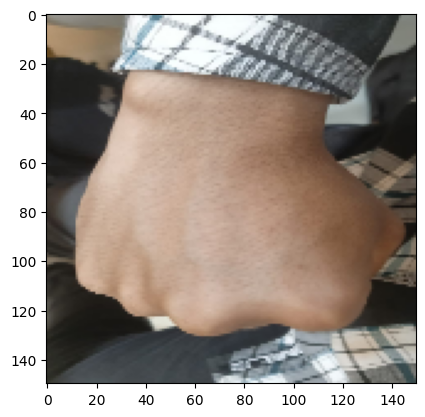

In [69]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes [0][0]==1:
   print('paper')
  elif classes [0][1] ==1:
   print('rock')
  elif classes [0][2] ==1:
   print('scissors')
  else:
    print('tidak terdeteksi')

In [70]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

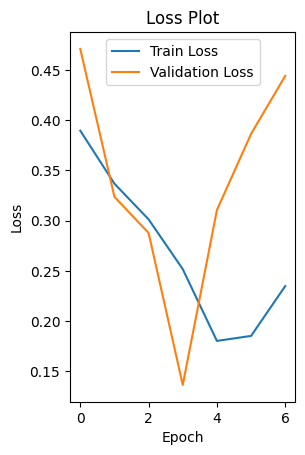

In [71]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()